In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn as nn
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
from string import ascii_letters

**a:**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Deep_Learning/hw2/Data/HW2_data/international_matches.csv')

In [ ]:
df.tail(10)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23911,2022-06-14,Ukraine,Republic of Ireland,Europe,Europe,27,47,1535,1449,1,...,No,Draw,75.0,75.0,74.8,78.7,80.0,76.5,72.7,73.8
23912,2022-06-14,Bosnia and Herzegovina,Finland,Europe,Europe,59,57,1388,1406,3,...,No,Win,76.0,83.0,74.2,77.0,78.0,70.0,72.3,73.5
23913,2022-06-14,Romania,Montenegro,Europe,Europe,48,70,1446,1342,0,...,No,Lose,77.0,65.0,73.5,73.7,75.0,76.2,74.7,68.2
23914,2022-06-14,Luxembourg,Faroe Islands,Europe,Europe,94,124,1229,1137,2,...,No,Draw,69.0,NaN,68.5,NaN,69.8,NaN,NaN,NaN
23915,2022-06-14,Turkey,Lithuania,Europe,Europe,43,138,1461,1092,2,...,No,Win,79.0,71.0,78.2,76.7,78.2,NaN,NaN,NaN
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0
23920,2022-06-14,Korea Republic,Egypt,Asia,Africa,29,32,1519,1500,4,...,No,Win,75.0,NaN,73.0,80.0,73.8,NaN,79.3,70.8


**b:**

In [ ]:
import os
from torchvision.transforms import ToTensor, Lambda
import pandas as pd
from torchvision.io import read_image
from torch.utils.data import Dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_1 = df[df["home_team_result"] == "Win"]
df_2 = df[df["home_team_result"] == "Draw"]
df_3 = df[df["home_team_result"] == "Lose"]

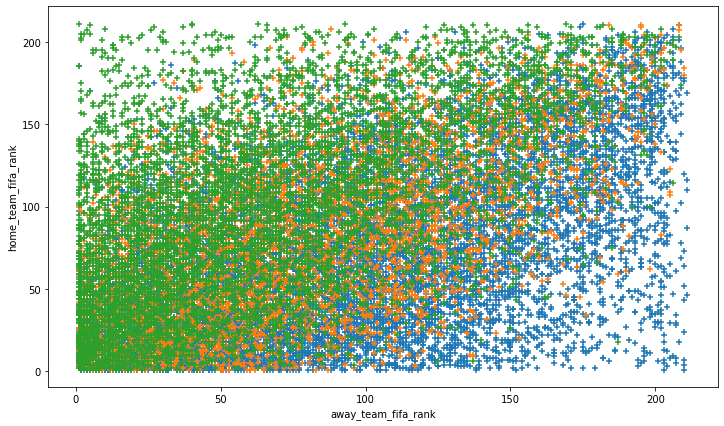

In [ ]:
plt.figure(figsize=(12, 7))

plt.scatter( df_1['away_team_fifa_rank'], df_1['home_team_fifa_rank'], marker="+")
plt.scatter( df_2['away_team_fifa_rank'], df_2['home_team_fifa_rank'], marker="+")
plt.scatter( df_3['away_team_fifa_rank'], df_3['home_team_fifa_rank'], marker="+")
plt.xlabel('away_team_fifa_rank')
plt.ylabel('home_team_fifa_rank')
plt.show()

**C:**

In [ ]:
new_df = df[~((df['away_team_total_fifa_points'] == 0) | (df['home_team_total_fifa_points'] == 0))].loc[:, ['home_team_fifa_rank', 'away_team_fifa_rank', 'home_team_total_fifa_points', 'away_team_total_fifa_points', 'home_team_result']]
target = new_df['home_team_result']
new_df = new_df.loc[:,['home_team_fifa_rank', 'away_team_fifa_rank', 'home_team_total_fifa_points', 'away_team_total_fifa_points']]
normalized_df=(new_df-new_df.mean())/new_df.std()
features = normalized_df.to_numpy()

In [ ]:
target[target=="Win"] = 0
target[target=="Lose"] = 1
target[target=="Draw"] = 2
labels = target.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=42)

In [ ]:
y_h = lambda y : torch.zeros(3, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1)
class CustomImageDataset(Dataset):
    def __init__(self, features, target, transform=None, target_transform=None):
        self.target = target
        self.features = features
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.target)

    def __getitem__(self, idx):
        # img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        # image = read_image(img_path)
        # label = self.img_labels.iloc[idx, 1]
        x = self.features[idx,:]
        label = self.target[idx]
        # y = self.target[idx]
        # if self.transform:
        #     image = self.transform(image)
        if self.target_transform:
            label = y_h(self.target[idx])
        return torch.tensor(x), label

In [ ]:
train = CustomImageDataset(X_train, y_train, target_transform=True)
test = CustomImageDataset(X_test, y_test)

**d:**

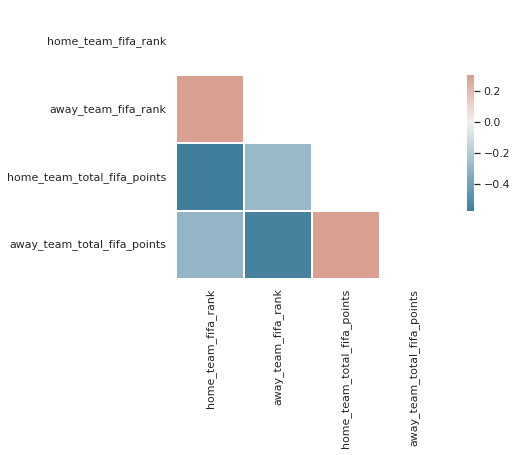

In [ ]:
sns.set_theme(style="white")
corr = normalized_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(7, 5))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

**e:**

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear1 = nn.Linear(4, 10)
        self.linear2 = nn.Linear(10, 20)
        self.linear3 = nn.Linear(20, 8)
        self.relu = nn.ReLU()
        self.linear4 = nn.Linear(8, 3)
    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        x = self.relu(x)
        x = self.linear3(x)
        x = self.relu(x)
        logits = self.linear4(x)
        probs = nn.Softmax(dim=1)(logits)
        return probs

**f:**

In [ ]:
torch.manual_seed(54)
model = NeuralNetwork().to(device)
model.train()

NeuralNetwork(
  (linear1): Linear(in_features=4, out_features=10, bias=True)
  (linear2): Linear(in_features=10, out_features=20, bias=True)
  (linear3): Linear(in_features=20, out_features=8, bias=True)
  (relu): ReLU()
  (linear4): Linear(in_features=8, out_features=3, bias=True)
)

In [ ]:
learning_rate = 1e-3
batch_size = 64
epochs = 350
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
train_dataloader = DataLoader(train, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test, batch_size=batch_size, shuffle=True)

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        X = X.to(torch.float32)
        pred = model(X)
        loss = loss_fn(pred, y)
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X = X.to(torch.float32)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 1.132656  [    0/  113]
loss: 1.131954  [ 6400/  113]
Test Error: 
 Accuracy: 23.6%, Avg loss: 1.124036 

Epoch 2
-------------------------------
loss: 1.145426  [    0/  113]
loss: 1.123817  [ 6400/  113]
Test Error: 
 Accuracy: 23.6%, Avg loss: 1.123407 

Epoch 3
-------------------------------
loss: 1.118036  [    0/  113]
loss: 1.089270  [ 6400/  113]
Test Error: 
 Accuracy: 23.6%, Avg loss: 1.122215 

Epoch 4
-------------------------------
loss: 1.125868  [    0/  113]
loss: 1.114951  [ 6400/  113]
Test Error: 
 Accuracy: 23.6%, Avg loss: 1.121396 

Epoch 5
-------------------------------
loss: 1.125374  [    0/  113]
loss: 1.120492  [ 6400/  113]
Test Error: 
 Accuracy: 23.6%, Avg loss: 1.120195 

Epoch 6
-------------------------------
loss: 1.123728  [    0/  113]
loss: 1.124314  [ 6400/  113]
Test Error: 
 Accuracy: 23.6%, Avg loss: 1.119377 

Epoch 7
-------------------------------
loss: 1.101765  [    0/  113]
loss: 1.125699  [ 

In [ ]:
test_loop(test_dataloader,  model, loss_fn)

Test Error: 
 Accuracy: 48.9%, Avg loss: 1.044332 



Test Accuracy on given network:
%48.9

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [ ]:
class My_NeuralNetwork(nn.Module):
    def __init__(self):
        super(My_NeuralNetwork, self).__init__()
        self.linear1 = nn.Linear(4, 10)
        self.linear2 = nn.Linear(10, 15)
        self.linear3 = nn.Linear(15, 10)
        self.linear4 = nn.Linear(10, 6)
        self.linear5 = nn.Linear(6, 3)
        self.relu = nn.ReLU()
    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        x = self.relu(x)
        x = self.linear3(x)
        x = self.relu(x)
        x = self.linear4(x)
        x = self.relu(x)
        logits = self.linear5(x)
        probs = nn.Softmax(dim=1)(logits)
        return probs
torch.manual_seed(54)
my_model = My_NeuralNetwork().to(device)
my_model.train()

My_NeuralNetwork(
  (linear1): Linear(in_features=4, out_features=10, bias=True)
  (linear2): Linear(in_features=10, out_features=15, bias=True)
  (linear3): Linear(in_features=15, out_features=10, bias=True)
  (linear4): Linear(in_features=10, out_features=6, bias=True)
  (linear5): Linear(in_features=6, out_features=3, bias=True)
  (relu): ReLU()
)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Deep_Learning/hw2/Data/HW2_data/international_matches.csv')
new_df = df[~((df['away_team_total_fifa_points'] == 0) | (df['home_team_total_fifa_points'] == 0))].loc[:, ['home_team_fifa_rank', 'away_team_fifa_rank', 'home_team_total_fifa_points', 'away_team_total_fifa_points', 'home_team_result']]
target = new_df['home_team_result']
new_df = new_df.loc[:,['home_team_fifa_rank', 'away_team_fifa_rank', 'home_team_total_fifa_points', 'away_team_total_fifa_points']]
normalized_df = (new_df-new_df.mean())/new_df.std()

y = []
for i in target:
  if i =="Win":y.append(0)
  if i =="Draw":y.append(1)
  if i =="Lose":y.append(2)
X_train, X_test, y_train, y_test = train_test_split(normalized_df.to_numpy(), y, test_size=0.25, random_state=42)
n_values = max(y_train)+1
y = np.eye(n_values)[y_train]

In [ ]:
class CustomImageDataset(Dataset):
    def __init__(self, features, target, transform=None, target_transform=None):
        self.target = target
        self.features = features
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.target)

    def __getitem__(self, idx):
        # img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        # image = read_image(img_path)
        # label = self.img_labels.iloc[idx, 1]

        x = self.features[idx,:]
        y = self.target[idx]
        # if self.transform:
        #     image = self.transform(image)
        # if self.target_transform:
        #     label = self.target_transform(label)
        return torch.tensor(x), torch.tensor(y)

In [ ]:
learning_rate = 1e-3
batch_size = 64
epochs = 400
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(my_model.parameters(), lr=learning_rate)


from torch.utils.data import DataLoader
train = CustomImageDataset(X_train, y_train)
test = CustomImageDataset(X_test, y_test)
train_dataloader = DataLoader(train, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test, batch_size=batch_size, shuffle=True)

In [ ]:
def train_loop(dataloader, model_, loss_fn, optimizer):
    size = len(dataloader)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        X = X.to(torch.float32)
        pred = model_(X)
        loss = loss_fn(pred, y)
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
def test_loop(dataloader, model_, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X = X.to(torch.float32)
            pred = model_(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, my_model, loss_fn, optimizer)
    test_loop(test_dataloader, my_model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 1.094805  [    0/  113]
loss: 1.103886  [ 6400/  113]
Test Error: 
 Accuracy: 27.4%, Avg loss: 1.108583 

Epoch 2
-------------------------------
loss: 1.105881  [    0/  113]
loss: 1.105764  [ 6400/  113]
Test Error: 
 Accuracy: 27.4%, Avg loss: 1.108133 

Epoch 3
-------------------------------
loss: 1.111660  [    0/  113]
loss: 1.101511  [ 6400/  113]
Test Error: 
 Accuracy: 27.4%, Avg loss: 1.107479 

Epoch 4
-------------------------------
loss: 1.109042  [    0/  113]
loss: 1.110581  [ 6400/  113]
Test Error: 
 Accuracy: 27.4%, Avg loss: 1.106956 

Epoch 5
-------------------------------
loss: 1.102418  [    0/  113]
loss: 1.105480  [ 6400/  113]
Test Error: 
 Accuracy: 27.4%, Avg loss: 1.106273 

Epoch 6
-------------------------------
loss: 1.100285  [    0/  113]
loss: 1.105367  [ 6400/  113]
Test Error: 
 Accuracy: 27.4%, Avg loss: 1.105538 

Epoch 7
-------------------------------
loss: 1.100958  [    0/  113]
loss: 1.108016  [ 

In [ ]:
test_loop(test_dataloader,  my_model, loss_fn)

Test Error: 
 Accuracy: 57.4%, Avg loss: 0.981054 



Accuracy on my network: %57.4

In [ ]:
# y_test_predicted = my_model(torch.tensor(X_test).to(torch.float32))
# correct = (y_test_predicted.argmax(1) == torch.tensor(y_test)).sum().item()
# accuracy = correct / len(y_test_predicted)
# print("accuracy:\n", accuracy)

g:

In [ ]:
da = {'team':['England', 'Wales', 'USA'],
        'home_team_fifa_rank':[5, 19, 20],
        'away_team_fifa_rank':[20, 20, 16],
        'home_team_total_fifa_points':[1728.47, 1569.82, 1564.61],
        'away_team_total_fifa_points':[1564.61, 1564.61, 1627.48]}
test_da = pd.DataFrame(da)
test_da

,team,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points
0,England,5,20,1728.47,1564.61
1,Wales,19,20,1569.82,1564.61
2,USA,20,16,1564.61,1627.48


In [ ]:
features = test_da.loc[:,["home_team_fifa_rank", "away_team_fifa_rank", "home_team_total_fifa_points", "away_team_total_fifa_points"]]
features = np.array(features)

In [ ]:
output = my_model(torch.tensor(features).to(torch.float32)).argmax(1)
y = []
for i in output:
  if i ==0:y.append("Win")
  if i ==1:y.append("Draw")
  if i ==2:y.append("Lose")

print(y)

['Win', 'Win', 'Win']


با توجه به اینکه ایران در بازی اول و دوم مهمان تیمم های انگلیس و ولز است و در بازی سوم میزبان تیم آمریکاست، نتیجه بالا بیانگر این است که ایران در بازی اول و دوم خواهد باخت و در بازی سوم برنده خواهد بود